In [61]:
import pandas as pd
import numpy as np

df = pd.read_csv("./iris.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


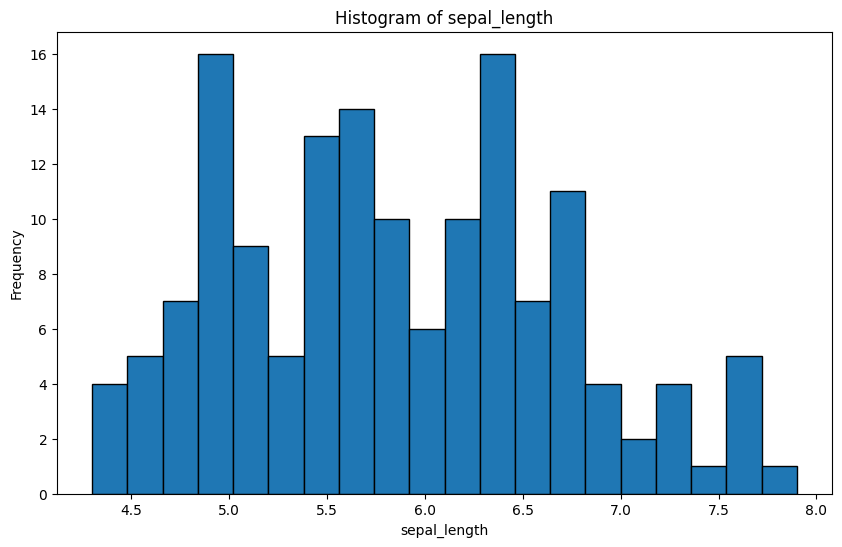

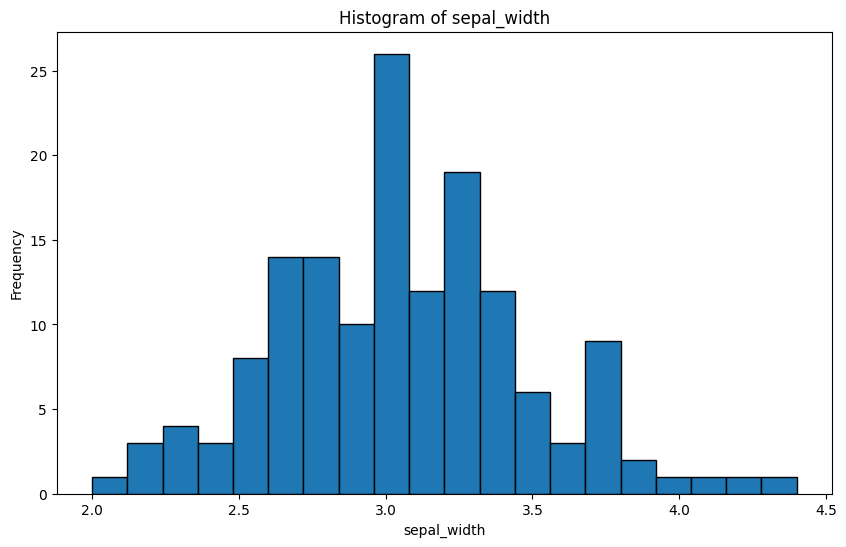

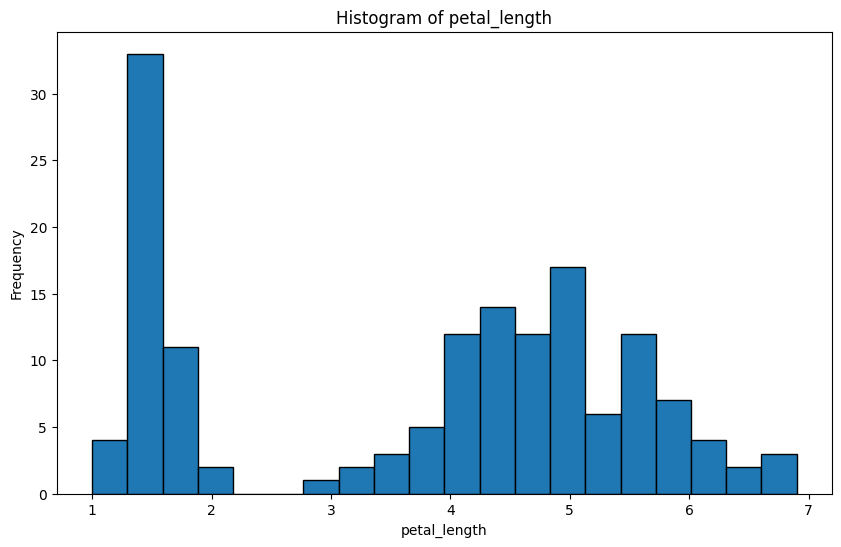

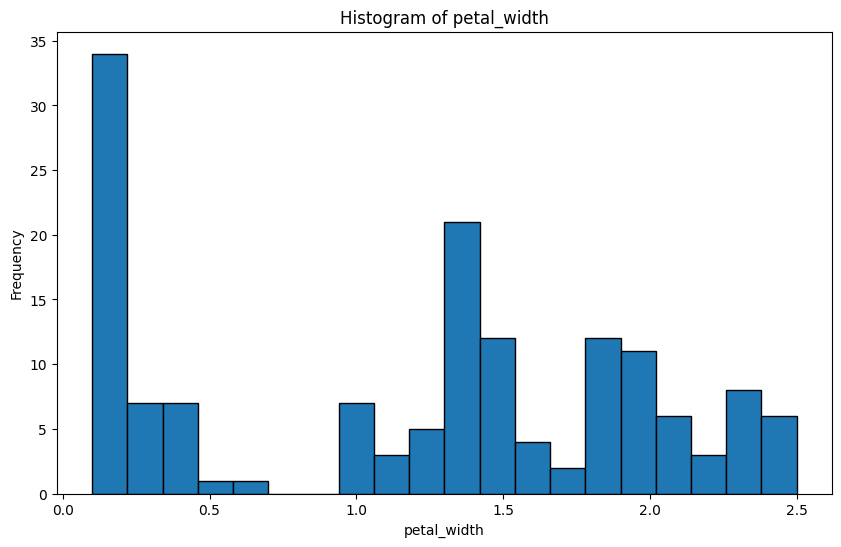

In [62]:
import matplotlib.pyplot as plt

def plot_column(column_name):
    plt.figure(figsize=(10, 6))
    plt.hist(df[column_name], bins=20, edgecolor="black")
    plt.title(f"Histogram of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.show()

for col in df.columns[:-1]:
    plot_column(col)

In [63]:
class Standardizer:
    def __init__(self, df: pd.DataFrame) -> None:
        self.df = df

    def fit(self):
        cols = df.select_dtypes(exclude=["object"])
        for col in cols:
            current_mean = df[col].mean()
            current_std = df[col].std()
            self.df[col] = self.df[col].apply(lambda x: (x - current_mean) / current_std)
        return self.df
    
standardizer = Standardizer(df)
standardized_df = standardizer.fit()

standardized_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-5.684342e-16,-6.158037e-16,1.894781e-16,-1.894781e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.863780e+00,-2.430844e+00,-1.563497e+00,-1.439627e+00
25%,-8.976739e-01,-5.858010e-01,-1.223442e+00,-1.177559e+00
50%,-5.233076e-02,-1.245404e-01,3.351431e-01,1.327811e-01
75%,6.722490e-01,5.673506e-01,7.602119e-01,7.879511e-01
max,2.483699e+00,3.104284e+00,1.780377e+00,1.705189e+00


In [64]:
X = standardized_df.select_dtypes(exclude=["object"]).values
type(X)

numpy.ndarray

In [65]:
mean_vector = X.mean(axis=0)
derivation = X - mean_vector
n = X.shape[0]
covariance_matrix = (1 / (n - 1)) * derivation.T @ derivation
covariance_matrix

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [66]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_values

array([2.91081808, 0.92122093, 0.14735328, 0.02060771])

In [67]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [68]:
lbd = np.diag(eigen_values)
reconstructed_covariance = eigen_vectors @ lbd @ np.linalg.inv(eigen_vectors)
np.allclose(reconstructed_covariance, covariance_matrix)

True

In [69]:
reconstructed_covariance

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [70]:
sorted_eigneu_values = np.sort(eigen_values)[::-1]
explained_variance = sorted_eigneu_values / np.sum(sorted_eigneu_values)
explained_variance
k = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
k

2

In [71]:
p_k = eigen_vectors[:, :k]
X_pca = X @ p_k
X_pca

array([[-2.25698063e+00, -5.04015404e-01],
       [-2.07945912e+00,  6.53216394e-01],
       [-2.36004408e+00,  3.17413945e-01],
       [-2.29650366e+00,  5.73446613e-01],
       [-2.38080159e+00, -6.72514411e-01],
       [-2.06362348e+00, -1.51347827e+00],
       [-2.43754534e+00, -7.43137171e-02],
       [-2.22638327e+00, -2.46787172e-01],
       [-2.33413810e+00,  1.09148977e+00],
       [-2.18136797e+00,  4.47131117e-01],
       [-2.15626287e+00, -1.06702096e+00],
       [-2.31960686e+00, -1.58057946e-01],
       [-2.21665672e+00,  7.06750478e-01],
       [-2.63090249e+00,  9.35149145e-01],
       [-2.18497165e+00, -1.88366805e+00],
       [-2.24394778e+00, -2.71328133e+00],
       [-2.19539570e+00, -1.50869601e+00],
       [-2.18286636e+00, -5.12587094e-01],
       [-1.88775015e+00, -1.42633236e+00],
       [-2.33213620e+00, -1.15416686e+00],
       [-1.90816387e+00, -4.29027880e-01],
       [-2.19728429e+00, -9.49277150e-01],
       [-2.76490710e+00, -4.87882574e-01],
       [-1.

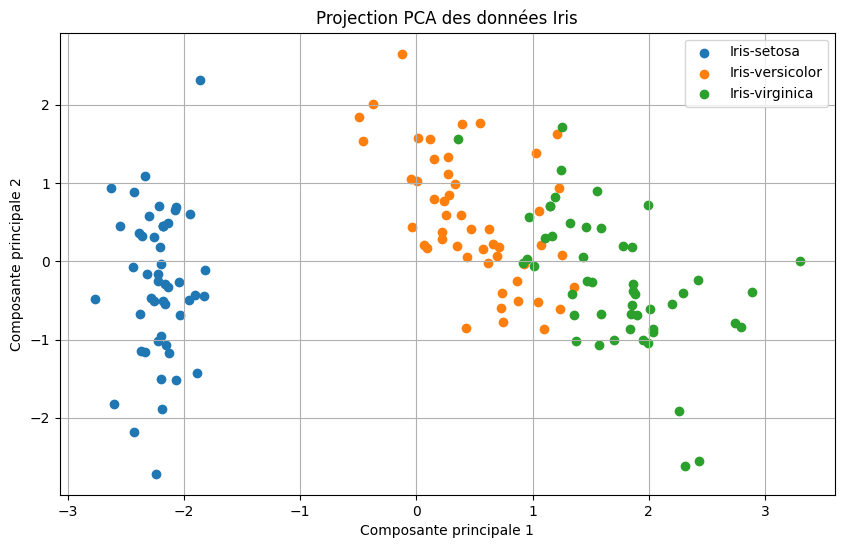

In [72]:
def plot_pca(X_pca, df):
    plt.figure(figsize=(10, 6))
    species = df["species"]
    for label in species.unique():
        idx = species == label
        plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=label)
    
    plt.xlabel("Composante principale 1")
    plt.ylabel("Composante principale 2")
    plt.title("Projection PCA des données Iris")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_pca(X_pca, df)
